In [1]:
# Notebook to analyze issue data from GitHub Repositories prepared by Jesus Cantu 
# Part 1 of the script used to to visualize the number of open and closed issues by time unit (month and year)
# Part 2 of the script analyzes the correlation between the number of comments and the duration of issues for multiple repositories

In [8]:
import os

# File Path
file_path = "/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Raw_Data/Issues" # ~/Workspace/MiningSoftwareRepositories/Raw_Data/Issues

print("Files in directory containing data for a GitHub Repository's Issues:")
for files in os.listdir(file_path):
    if files.endswith(".csv"):
        # Prints only text file present in My Folder
        print(files)

Files in directory containing data for a GitHub Repository's Issues:
swift-argument-parser_issues.csv
scikit-learn_issues.csv
Simple-Java-Calculator_issues.csv
Mindustry_issues.csv
numpy_issues.csv
matplotlib_issues.csv
scipy_issues.csv


In [9]:
# Load stationary copy of the data using repo name 
repo_name = "scikit-learn"
issues_df = pd.read_csv(f"{file_path}/{repo_name}_issues.csv")

In [10]:
issues_df.head(10)

,owner,repo_name,issue_id,state,labels,assignees,number_of_comments,created_at,closed_at,locked
0,scikit-learn,scikit-learn,26057,open,module:ensemble,NaN,0,2023-04-02T21:43:42Z,NaN,False
1,scikit-learn,scikit-learn,26056,open,"Documentation, Needs Triage",NaN,2,2023-04-02T20:03:42Z,NaN,False
2,scikit-learn,scikit-learn,26054,open,module:metrics,NaN,0,2023-04-02T10:34:03Z,NaN,False
3,scikit-learn,scikit-learn,26053,open,module:metrics,NaN,0,2023-04-02T10:11:39Z,NaN,False
4,scikit-learn,scikit-learn,26052,closed,Build / CI,NaN,6,2023-04-02T10:07:23Z,2023-04-02T14:58:26Z,False
5,scikit-learn,scikit-learn,26051,open,"module:ensemble, cython",NaN,0,2023-04-01T22:40:49Z,NaN,False
6,scikit-learn,scikit-learn,26050,open,API,NaN,0,2023-04-01T15:30:01Z,NaN,False
7,scikit-learn,scikit-learn,26049,open,"module:metrics, No Changelog Needed, Validation",NaN,1,2023-04-01T15:12:07Z,NaN,False
8,scikit-learn,scikit-learn,26048,open,"module:metrics, No Changelog Needed, Validation",NaN,0,2023-04-01T14:57:15Z,NaN,False
9,scikit-learn,scikit-learn,26047,open,"module:metrics, No Changelog Needed, Validation",NaN,0,2023-04-01T14:38:15Z,NaN,False


In [11]:
issues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25276 entries, 0 to 25275
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   owner               25276 non-null  object
 1   repo_name           25276 non-null  object
 2   issue_id            25276 non-null  int64 
 3   state               25276 non-null  object
 4   labels              12982 non-null  object
 5   assignees           486 non-null    object
 6   number_of_comments  25276 non-null  int64 
 7   created_at          25276 non-null  object
 8   closed_at           23128 non-null  object
 9   locked              25276 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 1.8+ MB


CSV files found in directory:
1: swift-argument-parser_issues.csv
2: scikit-learn_issues.csv
3: Simple-Java-Calculator_issues.csv
4: Mindustry_issues.csv
5: numpy_issues.csv
6: matplotlib_issues.csv
7: scipy_issues.csv


Enter the numbers corresponding to the CSV file names you want to process, 
separated by commas: (e.g. 1, 3, 7) 1, 2, 3, 4, 5, 5, 6, 7


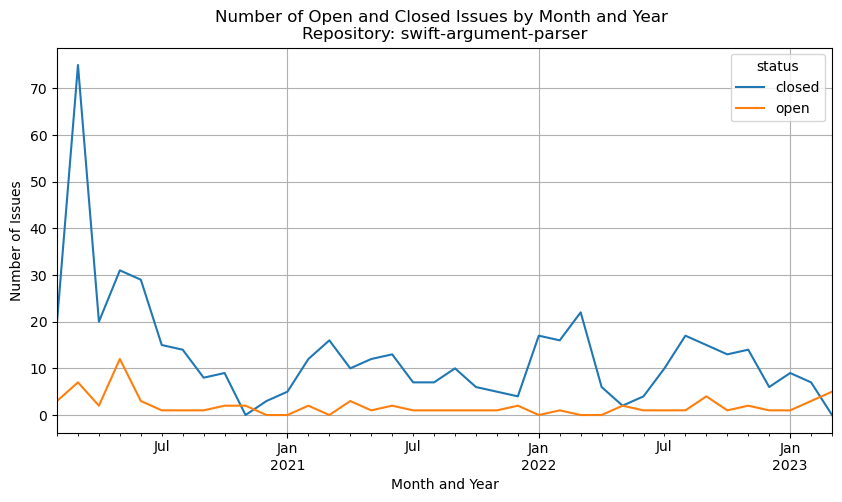

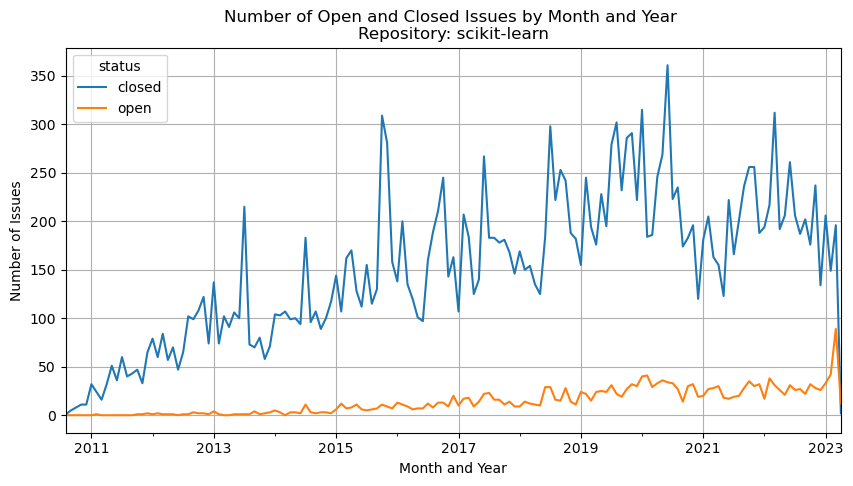

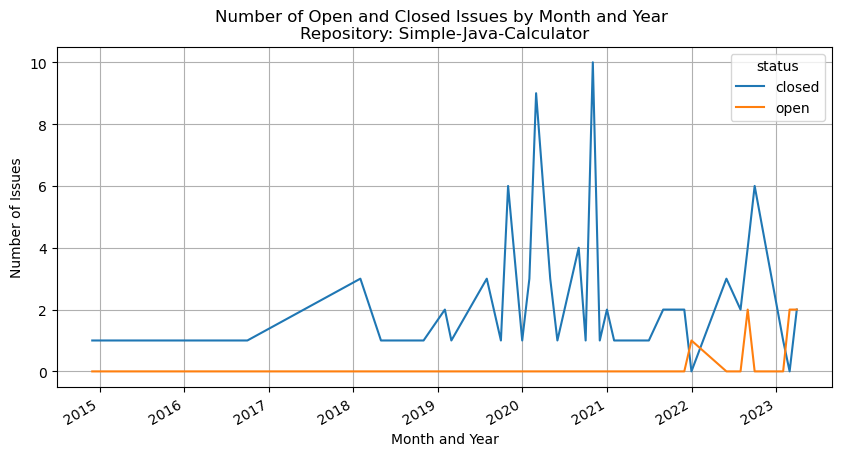

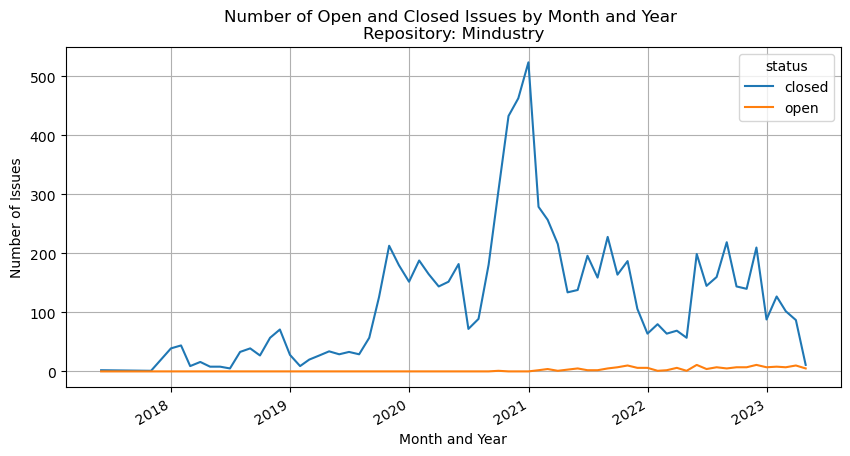

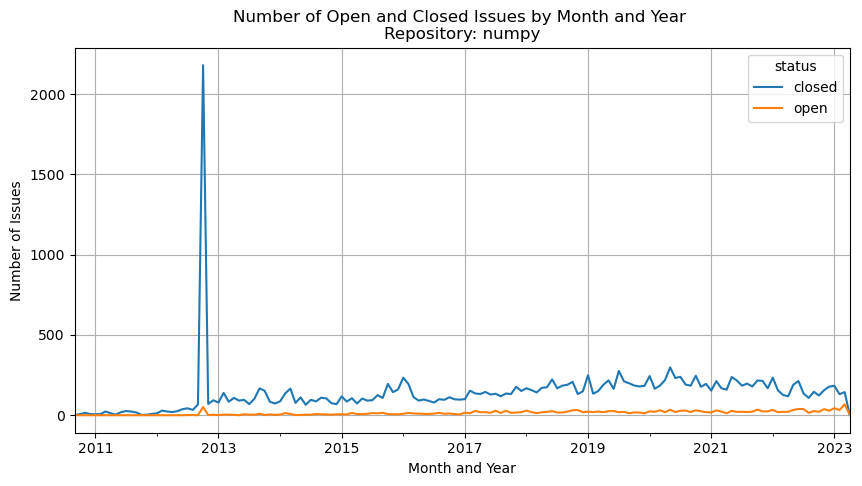



Plot for numpy_issues.csv already exists. Skipping...


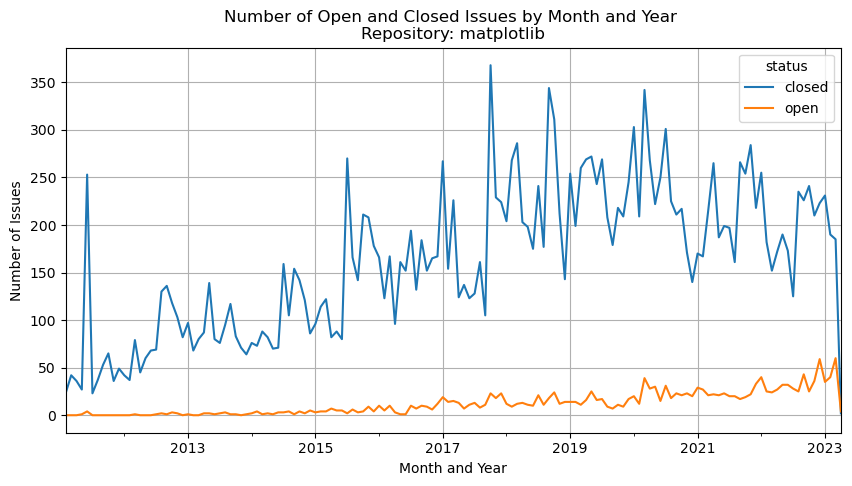

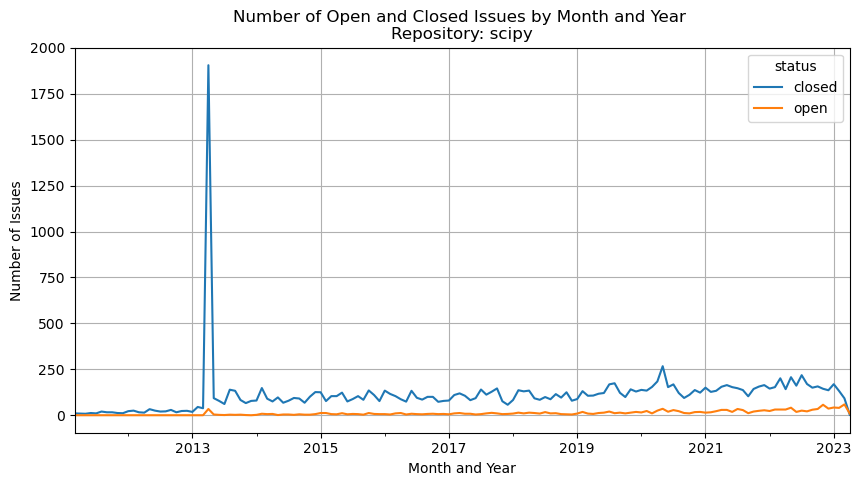



All selected CSV files have been processed and plotted.


In [22]:
"""
Part 1:
This code processes CSV files of issue data from Github repositories 
to visualize umber of open and closed issues by time unit (month and year)
Users input which CSV files to process, and the code checks if corresponding plot files already exist. 
If a plot file exists, the code skips processing the CSV file. 
If a plot file does not exist, the code loads the CSV file, creates a line plot of open and closed issues over time, 
and saves the plot as a PDF file in a specified directory.

"""
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set the path to the directory containing CSV files
csv_dir = '/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Raw_Data/Issues/' # ~/Workspace/MiningSoftwareRepositories/Raw_Data/Issues

# Set the path to the directory where plots will be saved
plot_dir = '/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/' # ~/Workspace/MiningSoftwareRepositories/Generated_Plots/

# Get the list of CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Print the list of CSV files with corresponding numbers
print('CSV files found in directory:')
for i, csv_file in enumerate(csv_files):
    print(f'{i+1}: {csv_file}')

# Ask the user which CSV files to process by entering the corresponding numbers, separated by commas
csv_files_to_process = input('Enter the numbers corresponding to the CSV file names you want to process, \nseparated by commas: (e.g. 1, 3, 7)')
csv_files_to_process = [int(f.strip()) for f in csv_files_to_process.split(',')]

# Loop through the selected CSV files
for num in csv_files_to_process:
    csv_file = csv_files[num-1]

    # Check if the corresponding plot already exists
    repo_name, owner = csv_file.split('.')[0].split('_')
    plot_file = os.path.join(plot_dir, f'{repo_name}_plot_issues_by_month_year.pdf')
    if os.path.isfile(plot_file):
        print(f'Plot for {csv_file} already exists. Skipping...')
        continue

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))

    # Convert the "created_at" and "closed_at" columns to datetime format
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['closed_at'] = pd.to_datetime(df['closed_at'])

    # Create a new column to indicate whether an issue is open or closed
    df['status'] = df['state'].apply(lambda x: 'open' if x == 'open' else 'closed')

    # Group the issues by month and year and count the number of open and closed issues
    df_grouped = df.groupby([pd.Grouper(key='created_at', freq='M'), 'status'])['issue_id'].count().reset_index()

    # Pivot the table to have open and closed issues as separate columns
    df_pivot = df_grouped.pivot(index='created_at', columns='status', values='issue_id')
    df_pivot = df_pivot.fillna(0)  # Fill any missing values with 0

    # Create a line plot to visualize the number of open and closed issues over time
    fig, ax = plt.subplots(figsize=(10, 5))
    df_pivot.plot(kind='line', ax=ax, grid=True)

    # Set the plot title and axis labels
    ax.set_title(f'Number of Open and Closed Issues by Month and Year \nRepository: {repo_name}')
    ax.set_xlabel('Month and Year')
    ax.set_ylabel('Number of Issues')

    # Save the plot as a PDF file in the plot directory
    plt.savefig(plot_file)
    plt.show()
    print() # add space between plots 
    print()

    # Close the plot to free up memory
    plt.close()

print('All selected CSV files have been processed and plotted.')


CSV files found in directory:
1: swift-argument-parser_issues.csv
2: scikit-learn_issues.csv
3: Simple-Java-Calculator_issues.csv
4: Mindustry_issues.csv
5: numpy_issues.csv
6: matplotlib_issues.csv
7: scipy_issues.csv


Enter the numbers corresponding to the CSV file names you want to process for correlation analysis, 
separated by commas: (e.g. 1, 3, 7) 1, 2, 3, 4, 5, 6, 7


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/swift-argument-parser_correlation_comments_duration.pdf


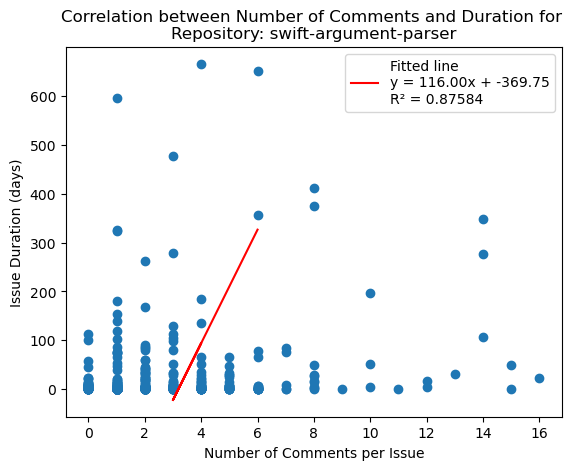

The correlation between number of comments and duration for swift-argument-parser Repository is 0.94 with a p-value of 0.064134374703324
The correlation is statistically significant at a 10% level.


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/scikit-learn_correlation_comments_duration.pdf


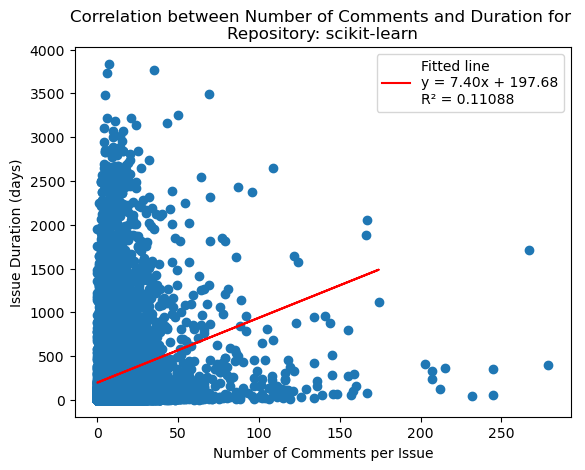

The correlation between number of comments and duration for scikit-learn Repository is 0.33 with a p-value of 0.000000000301475
The correlation is statistically significant at a 1% level.


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/Simple-Java-Calculator_correlation_comments_duration.pdf


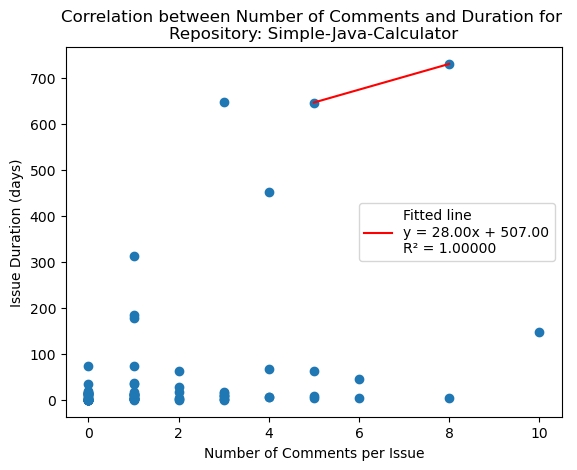

The correlation between number of comments and duration for Simple-Java-Calculator Repository is 1.00 with a p-value of 1.000000000000000
The correlation is not statistically significant.




/Users/jesuscantu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/jesuscantu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/jesuscantu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/Mindustry_correlation_comments_duration.pdf


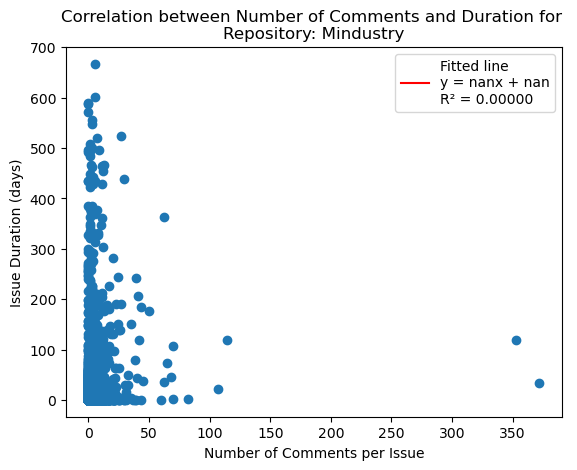

Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/numpy_correlation_comments_duration.pdf


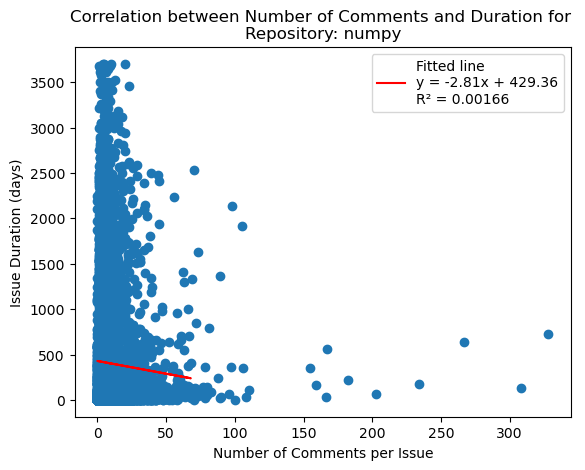

The correlation between number of comments and duration for numpy Repository is -0.04 with a p-value of 0.583156906826690
The correlation is not statistically significant.


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/matplotlib_correlation_comments_duration.pdf


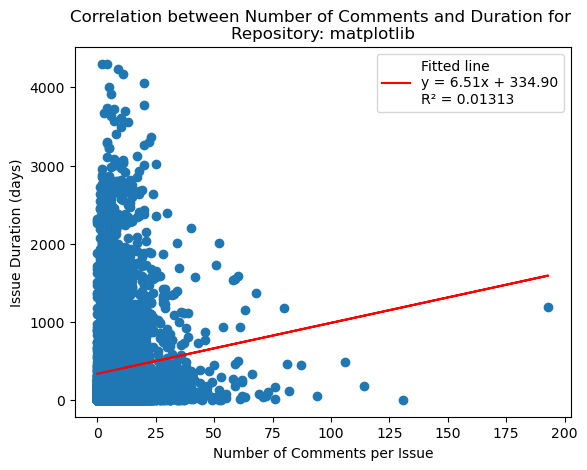

The correlation between number of comments and duration for matplotlib Repository is 0.11 with a p-value of 0.005019577535777
The correlation is statistically significant at a 1% level.


Plot saved as /Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/scipy_correlation_comments_duration.pdf


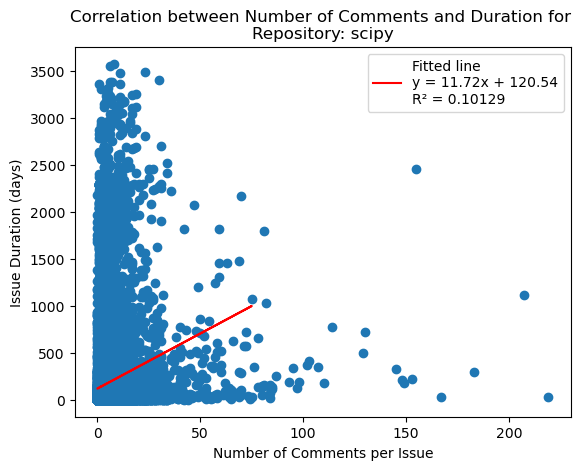

The correlation between number of comments and duration for scipy Repository is 0.32 with a p-value of 0.000010686406561
The correlation is statistically significant at a 1% level.




In [21]:
"""
Part 2:
The code analyzes the correlation between the number of comments 
and the duration of issues for multiple repositories. 
It reads CSV files from a specified directory, creates scatter plots, 
calculates correlation coefficients and significance levels, 
and saves the plots in a different directory. 
The user selects which CSV files to process by entering corresponding numbers.
"""

import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr, linregress
import warnings

# Set the path to the directory containing CSV files
csv_dir = '/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Raw_Data/Issues/' # ~/Workspace/MiningSoftwareRepositories/Raw_Data/Issues

# Set the path to the directory where plots will be saved
plot_dir = '/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots/' # ~/Workspace/MiningSoftwareRepositories/Generated_Plots/

# Get the list of CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Print the list of CSV files with corresponding numbers
print('CSV files found in directory:')
for i, csv_file in enumerate(csv_files):
    print(f'{i+1}: {csv_file}')

# Ask the user which CSV files to process by entering the corresponding numbers, separated by commas
csv_files_to_process = input('Enter the numbers corresponding to the CSV file names you want to process for correlation analysis, \nseparated by commas: (e.g. 1, 3, 7)')
csv_files_to_process = [int(f.strip()) for f in csv_files_to_process.split(',')]

# Loop through the selected CSV files
for num in csv_files_to_process:
    csv_file = csv_files[num-1]

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    
    # Convert the date columns to datetime format
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['closed_at'] = pd.to_datetime(df['closed_at'])

    # Calculate the duration an issue remained open in days
    df['duration'] = (df['closed_at'] - df['created_at']).dt.days

    # Create a scatter plot of number of comments vs duration
    repo_name = df['repo_name'].unique()[0]  # get the unique repo name from the dataframe
    plt.scatter(df['number_of_comments'], df['duration'])
    plt.xlabel('Number of Comments per Issue')
    plt.ylabel('Issue Duration (days)')
    plt.title(f'Correlation between Number of Comments and Duration for \nRepository: {repo_name}')

    # Drop rows with missing values
    df = df.dropna()

    # Add a line of best fit
    try:
        slope, intercept, r_value, p_value, std_err = linregress(df['number_of_comments'], df['duration'])
    except ValueError:
        print(f"Error: Not enough data points in {repo_name} Repository for correlation analysis")
        continue
    line = f"y = {slope:.2f}x + {intercept:.2f}\nR\u00b2 = {r_value**2:.5f}"
    plt.plot(df['number_of_comments'], intercept + slope*df['number_of_comments'], 'r', label='Fitted line\n'+line)
    plt.legend()

    # Save the plot as a PDF
    file_name = f'{repo_name}_correlation_comments_duration.pdf'
    file_path = os.path.join('/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/Generated_Plots', file_name)
    plt.savefig(file_path)
    print(f"Plot saved as {file_path}")

    plt.show()
  
    # Calculate the correlation between the two variables and the p-value
    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        try:
            corr, p_value = pearsonr(df['number_of_comments'], df['duration'])
        except (RuntimeWarning, ValueError):
            print(f"Warning: Invalid correlation calculation for {repo_name} Repository")
            continue
    print(f"The correlation between number of comments and duration for {repo_name} Repository is {corr:.2f} with a p-value of {p_value:.15f}")
    
    # Determine the level of significance
    if p_value < 0.01:
        print("The correlation is statistically significant at a 1% level.")
        print() # add space between plots 
        print() 
    elif p_value < 0.05:
        print("The correlation is statistically significant at a 5% level.")
        print()  
        print() 
    elif p_value < 0.1:
        print("The correlation is statistically significant at a 10% level.")
        print()
        print() 
    else:
        print("The correlation is not statistically significant.")
        print() 
        print() 
    